In [16]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Check versions
print("PyTorch version: {}".format(torch.__version__))
print("Numpy version: {}".format(np.__version__))

PyTorch version: 1.0.0
Numpy version: 1.15.4


In [17]:
# Load Iris Dataset
FILE_PATH = "/home/nobug-ros/dev_ml/PyTorch-for-Iris-Dataset/"
MAIN_FILE_NAME = "iris_dataset.txt"
TRAIN_FILE_NAME = "iris_train_dataset.txt"
TEST_FILE_NAME = "iris_test_dataset.txt"

data = np.loadtxt(FILE_PATH+MAIN_FILE_NAME, delimiter=",")
mean_data = np.mean(data[:,:4], axis=0)
std_data = np.std(data[:,:4], axis=0)

train_data = np.loadtxt(FILE_PATH+TRAIN_FILE_NAME, delimiter=",")
test_data = np.loadtxt(FILE_PATH+TEST_FILE_NAME, delimiter=",")

print("Mean of features: {}".format(mean_data))
print("Std of features: {}".format(std_data))

Mean of features: [5.84333333 3.054      3.75866667 1.19866667]
Std of features: [0.82530129 0.43214658 1.75852918 0.76061262]


In [13]:
# Standardize (Preprocess) train and test data
for j in range(4):
    for i in range(train_data.shape[0]):
        train_data[i, j] = (train_data[i, j] - mean_data[j])/std_data[j]
    for i in range(test_data.shape[0]):
        test_data[i, j] = (test_data[i, j] - mean_data[j])/std_data[j] 

In [18]:
# Convert scaled test and train data into PyTorch tensor
train_data = torch.Tensor(train_data)
test_data = torch.Tensor(test_data)

## Start building the Neural Network using PyTorch

In [8]:
# Select device to compute cpu/gpu
device = torch.device('cpu')
# device = torch.device('gpu')

In [9]:
batch_sz, D_in, H, D_out = 4, 4, 8, 3
# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),
          torch.nn.ReLU(),
#           torch.nn.Linear(H, H),
#           torch.nn.ReLU(),
#           torch.nn.Linear(H, H),
#           torch.nn.ReLU(),
          torch.nn.Linear(H, D_out),
          torch.nn.Softmax(dim=0),
        )
# loss_fn = torch.nn.BCELoss()
# loss_fn = torch.nn.L1Loss(reduction='mean')
loss_fn = torch.nn.MSELoss(reduction='mean')
# loss_fn = torch.nn.PairwiseDistance(p=2)
# loss_fn = torch.nn.CrossEntropyLoss()

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use Adam; the optim package contains many other
# optimization algoriths. The first argument to the Adam constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

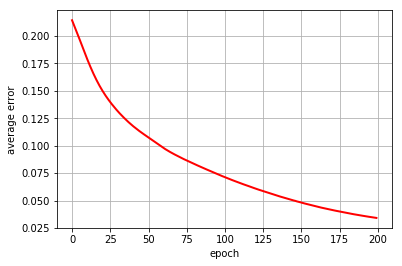

In [10]:
# m = torch.nn.Sigmoid()
idx = np.arange(train_data.size()[0])
avg_loss_list = list()
epoch_list = list()
for epoch in range(200):
    total_loss = 0
    np.random.shuffle(idx)
    for id in idx:
#     for id in range(30):
        # Forward pass: compute predicted y by passing x to the model.
        y_pred = model(train_data[id,0:4])
        y = train_data[id,4:]
#         y_pred = model(train_data[batch_sz*id:batch_sz*(id+1), 0:4])
#         y = train_data[batch_sz*id:batch_sz*(id+1), 4:]

#         print ("Actual label: {}".format(y))
#         print("Predicted label: {}".format(y_pred))

        # Compute and print loss.
#         loss = loss_fn(m(y_pred), y)
        loss = loss_fn(y_pred, y)
#         print(t, loss.item())
        total_loss += loss

        # Before the backward pass, use the optimizer object to zero all of the
        # gradients for the Tensors it will update (which are the learnable weights
        # of the model)
        optimizer.zero_grad()

        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()

        # Calling the step function on an Optimizer makes an update to its parameters
        optimizer.step()

    avg_loss = total_loss/train_data.size()[0]
    avg_loss_list.append(avg_loss)
    epoch_list.append(epoch)
#     print("Epoch: {}, Total in-sample error: {}".format(epoch, avg_loss))
    
# Plot loss
plt.plot(epoch_list, avg_loss_list, 'r-', lw=2)
plt.xlabel("epoch")
plt.ylabel("average error")
plt.grid(True)
plt.show()

In [11]:
y_pred_test = model(test_data[21,0:4])
y_pred_test

tensor([2.1211e-04, 1.0060e-01, 8.9918e-01], grad_fn=<SoftmaxBackward>)

In [12]:
a = np.array([[0.1, 0.2, 0.5, 0.9],[0.5, 0.2, 0.4, 0.7],[0.1, 0.2, 0.5, 0.1],[0.5, 0.8, 0.3, 0.1]])
a
print(np.std(a, axis=0))
print(np.std(a, axis=1))
print(np.mean(a, axis=0))
print(np.mean(a, axis=1))

[0.2        0.25980762 0.08291562 0.35707142]
[0.31124749 0.18027756 0.16393596 0.25860201]
[0.3   0.35  0.425 0.45 ]
[0.425 0.45  0.225 0.425]
